In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

In [4]:
y = torch.arange(10, dtype=torch.float32) + torch.randn(10)

In [5]:
y

tensor([1.4548, 1.8967, 1.9147, 4.3039, 6.0628, 4.5503, 5.9044, 6.8554, 9.3773,
        9.2117])

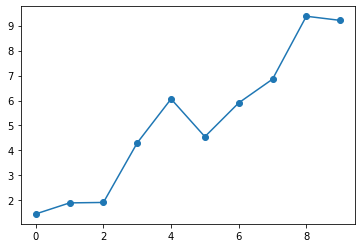

In [8]:
plt.plot(y)
plt.scatter(torch.arange(10), y)
plt.show()

In [47]:
m = torch.tensor([-1.0], requires_grad=True)
b = torch.tensor([1.0], requires_grad=True)

In [48]:
x = torch.arange(10, dtype=torch.float32)

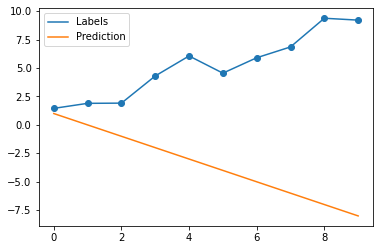

In [49]:
plt.plot(y, label="Labels")
with torch.no_grad():
    plt.plot(m * x + b, label="Prediction")
plt.scatter(torch.arange(10), y)
plt.legend()
plt.show()

In [50]:
learning_rate = 1e-2
slopes = []
intercepts = []

losses = []

In [51]:
for i in range(10):
    prediction = m * x + b
    loss = ((y - prediction) ** 2).mean()
    
    m.retain_grad()
    b.retain_grad()
    
    loss.backward()
    with torch.no_grad():
        m -= learning_rate * m.grad
        b -= learning_rate * b.grad
        
        slopes.append(m.clone().detach().numpy())
        intercepts.append(b.clone().detach().numpy())
        losses.append(loss.detach().numpy())
    m.grad.zero_()
    b.grad.zero_()

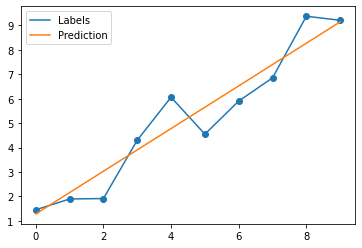

In [52]:
plt.plot(y, label="Labels")
with torch.no_grad():
    plt.plot(m * x + b, label="Prediction")
plt.scatter(torch.arange(10), y)
plt.legend()
plt.show()

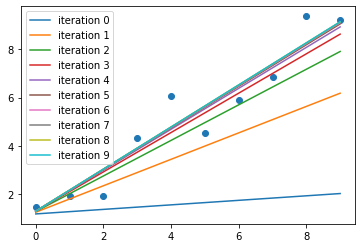

In [53]:
plt.scatter(x, y)
for i, (m, b) in enumerate(zip(slopes, intercepts)):
    plt.plot(x, (m*x.numpy() + b), label=f"iteration {i}")
plt.legend()
plt.show()

In [ ]:
import torchvision
